<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study-4:-Classifying-Whiskies" data-toc-modified-id="Case-Study-4:-Classifying-Whiskies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study 4: Classifying Whiskies</a></span><ul class="toc-item"><li><span><a href="#Getting-Started-with-Pandas" data-toc-modified-id="Getting-Started-with-Pandas-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Getting Started with Pandas</a></span></li><li><span><a href="#Loading-and-Inspecting-Data" data-toc-modified-id="Loading-and-Inspecting-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Loading and Inspecting Data</a></span></li><li><span><a href="#Exploring-Correlations" data-toc-modified-id="Exploring-Correlations-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exploring Correlations</a></span></li><li><span><a href="#Clustering-Whiskies-By-Flavor-Profile" data-toc-modified-id="Clustering-Whiskies-By-Flavor-Profile-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Clustering Whiskies By Flavor Profile</a></span></li><li><span><a href="#Comparing-Correlation-Matrices" data-toc-modified-id="Comparing-Correlation-Matrices-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Comparing Correlation Matrices</a></span></li></ul></li></ul></div>

## Case Study 4: Classifying Whiskies

### Getting Started with Pandas

Pandas is a Python library that provides data structures and functions for working with structured data, primarily tabular data.

Pandas is built on top of NumPy and some familiarity with NumPy makes Pandas easier to use and understand.

Pandas has two data structures that you need to know the basics of, and these are called Series and Data Frame.

In short, Series is a one-dimensional array-like object, and Data Frame is a two-dimensional array-like object.

Both objects also contain additional information about the data called metadata, and this is something that will become clear through examples.

In [861]:
import pandas as pd

x = pd.Series([6,3,8,6])

In [862]:
x

0    6
1    3
2    8
3    6
dtype: int64

Here the data array is shown in the right column, and the left column shows the index, which is an array of data labels.

Because we didn't specify an index explicitly, Pandas is using the default index, which is a sequence of integers starting at 0, increasing one by one for every subsequent row.

Let's now specify an index explicitly.

In [863]:
x = pd.Series([6,3,8,6], index=["q", "w", "e", "r"])

In [864]:
x

q    6
w    3
e    8
r    6
dtype: int64

You can use the index to specify values or a set of values.

In [865]:
x["w"]

3

In [866]:
x[["r", "w"]]

r    6
w    3
dtype: int64

There are many ways to construct a Series object in Pandas.

A common way is by passing a dictionary.

In [867]:
age = {"Tim": 29, "Jim": 31, "Pam": 27, "Same": 35}
x = pd.Series(age)

In [868]:
x

Tim     29
Jim     31
Pam     27
Same    35
dtype: int64

You'll notice from the output that the index of the Series consists of keys of the dictionary in sorted order.

And the values are the value objects in the dictionary.

Data Frames represent table-like data, and they have both row and column index.

Like with Series, there are many ways to construct a Data Frame.

A common way is by passing a dictionary where the value objects are lists or NumPy arrays of equal length.

In [869]:
data =  {
    "name": ['Tim', 'Jim', 'Pam', 'Sam'],
    "age": [29, 31, 27, 35],
    "ZIP": ['02115', '02130', '67700', '00100']
}

x = pd.DataFrame(data, columns=["name", "age", "ZIP"])

In [870]:
x

name  age    ZIP
0  Tim   29  02115
1  Jim   31  02130
2  Pam   27  67700
3  Sam   35  00100

We can retrieve a column by using dictionary-like notation or we can specify the name of the column as an attribute of the Data Frame.

In [871]:
x["name"]

0    Tim
1    Jim
2    Pam
3    Sam
Name: name, dtype: object

In [872]:
x.name

0    Tim
1    Jim
2    Pam
3    Sam
Name: name, dtype: object

We often need to re-index a Series or a Data Frame object.

This does not affect the association between the index and the corresponding data, but instead it essentially reorders the data in the object.

In [873]:
x = pd.Series([6,3,8,6], index=["q", "w", "e", "r"])

In [874]:
x

q    6
w    3
e    8
r    6
dtype: int64

In [875]:
x.index

Index(['q', 'w', 'e', 'r'], dtype='object')

In [876]:
sorted(x.index)

['e', 'q', 'r', 'w']

In [877]:
x.reindex(sorted(x.index))

e    8
q    6
r    6
w    3
dtype: int64

If we, for example, add two Series objects together, the data alignment happens by index.

What that means is that entries in the series that have the same index are added together in the same way we might add elements of a NumPy array.

If the indices do not match, however, Pandas introduces a NAN, or not a number object, the resulting series.

In [878]:
x = pd.Series([6,3,8,6], index=["q", "w", "e", "r"])
y = pd.Series([7,3,5,2], index=["e", "q", "r", "t"])

In [879]:
x+y

e    15.0
q     9.0
r    11.0
t     NaN
w     NaN
dtype: float64

Arithmetic operations for DataFrame works the same way

Pandas has many, many more features.

You can summarize data, compute correlations, handle missing data, use hierarchical indexing, and much, much more.

### Loading and Inspecting Data

We've made two text files available on the course site, and they contain the data needed in this case study.

The two files are called whiskies.txt and regions.txt.

The regions file contains the regions in which each of the whiskies produced.

The whiskies file contains all other details about the whiskies.

We'll first read whiskies into a pandas data frame object, and we'll read regions and add that as a column to the whisky object.

In [880]:
import numpy as np
import pandas as pd

whisky = pd.read_csv("whiskies.txt")
whisky["Region"] = pd.read_csv("regions.txt")

In [881]:
whisky.head()

RowID Distillery  Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  Spicy  \
0      1  Aberfeldy     2          2      2          0        0      2      1   
1      2   Aberlour     3          3      1          0        0      4      3   
2      3     AnCnoc     1          3      2          0        0      2      0   
3      4     Ardbeg     4          1      4          4        0      0      2   
4      5    Ardmore     2          2      2          0        0      1      1   

   Winey  Nutty  Malty  Fruity  Floral     Postcode   Latitude   Longitude  \
0      2      2      2       2       2   \tPH15 2EB     286580      749680   
1      2      2      3       3       2   \tAB38 9PJ     326340      842570   
2      0      2      2       3       2    \tAB5 5LI     352960      839320   
3      0      1      2       1       0   \tPA42 7EB     141560      646220   
4      1      2      3       1       1   \tAB54 4NH     355350      829140   

      Region  
0  Highlands  
1   Speyside  
2  Highlands  
3      Islay  
4  Highlands

In [882]:
whisky.tail()

RowID    Distillery  Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  \
81     82     Tobermory     1          1      1          0        0      1   
82     83       Tomatin     2          3      2          0        0      2   
83     84     Tomintoul     0          3      1          0        0      2   
84     85       Tormore     2          2      1          0        0      1   
85     86  Tullibardine     2          3      0          0        1      0   

    Spicy  Winey  Nutty  Malty  Fruity  Floral   Postcode   Latitude  \
81      0      0      1      2       2       2   PA75 6NR     150450   
82      2      1      1      2       0       1   IV13 7YT     279120   
83      2      1      1      2       1       2   AB37 9AQ     315100   
84      0      1      2      1       0       0   PH26 3LR     315180   
85      2      1      1      2       2       1    PH4 1QG     289690   

     Longitude     Region  
81      755070    Islands  
82      829630  Highlands  
83      825560   Speyside  
84      834960   Speyside  
85      708850  Highlands

It looks like the data has been read incorrectly.

We can use the iloc method to index a data frame by location.

We'll type whisky.iloc, and we've can first specify the rows.

In this case, we specify the rows from 0 to 10.

As with standard Python, the start index is inclusive whereas the end index is exclusive.

That means the last row corresponding to index 10 is not included.

We can use the same method to look at specific columns and specific rows.

We can look at rows from 5 to 10, and we can look at columns from 0 to 5.

The first 5 to 10 corresponds to rows, and the 0 to 5 corresponds to our columns.


If we type whisky.columns, panda lists us the names of the different columns of our data frame object.

In [883]:
whisky.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'Region'],
      dtype='object')

In this case, we would like to look at all of the columns starting from body and ending at floral, floral included.

In [884]:
flavors = whisky.iloc[:,2:14]

In [885]:
flavors

Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  Spicy  Winey  Nutty  \
0      2          2      2          0        0      2      1      2      2   
1      3          3      1          0        0      4      3      2      2   
2      1          3      2          0        0      2      0      0      2   
3      4          1      4          4        0      0      2      0      1   
4      2          2      2          0        0      1      1      1      2   
..   ...        ...    ...        ...      ...    ...    ...    ...    ...   
81     1          1      1          0        0      1      0      0      1   
82     2          3      2          0        0      2      2      1      1   
83     0          3      1          0        0      2      2      1      1   
84     2          2      1          0        0      1      0      1      2   
85     2          3      0          0        1      0      2      1      1   

    Malty  Fruity  Floral  
0       2       2       2  
1       3       3       2  
2       2       3       2  
3       2       1       0  
4       3       1       1  
..    ...     ...     ...  
81      2       2       2  
82      2       0       1  
83      2       1       2  
84      1       0       0  
85      2       2       1  

[86 rows x 12 columns]

### Exploring Correlations

We'll be using the core function to compute correlations across the columns of a data frame.

There are many different kinds of correlations, and by default, the function uses what is called Pearson correlation which estimates linear correlations in the data.

In other words, if you have measured attributes for two variables, let's call them x and y the Pearson correlation coefficient between x and y approaches plus 1 as the points in the xy scatterplot approach a straight upward line.

But what is the interpretation of a correlation coefficient in this specific context?

A large positive correlation coefficient indicates that the two flavor attributes in question tend to either increase or decrease together.

In other words, if one of them has a high score we would expect the other, on average, also to have a high score.

In [886]:
corr_flavors = pd.DataFrame.corr(flavors)
print(corr_flavors)

               Body  Sweetness     Smoky  Medicinal   Tobacco     Honey  \
Body       1.000000  -0.136518  0.524032   0.354050  0.168718  0.082031   
Sweetness -0.136518   1.000000 -0.405897  -0.392017 -0.147871  0.132558   
Smoky      0.524032  -0.405897  1.000000   0.686071  0.365501 -0.195318   
Medicinal  0.354050  -0.392017  0.686071   1.000000  0.425106 -0.396629   
Tobacco    0.168718  -0.147871  0.365501   0.425106  1.000000 -0.275490   
Honey      0.082031   0.132558 -0.195318  -0.396629 -0.275490  1.000000   
Spicy      0.188500  -0.054200  0.231745   0.044903  0.054068  0.139563   
Winey      0.408576   0.115727 -0.028190  -0.202651  0.009097  0.362021   
Nutty      0.126323  -0.032493 -0.023132  -0.113671 -0.117717  0.188492   
Malty     -0.116859  -0.001516 -0.192875  -0.258959 -0.059347  0.310184   
Fruity    -0.013205   0.019820 -0.312970  -0.330975 -0.235145  0.108822   
Floral    -0.461203   0.144987 -0.431663  -0.511323 -0.212375  0.183029   

              Spicy     

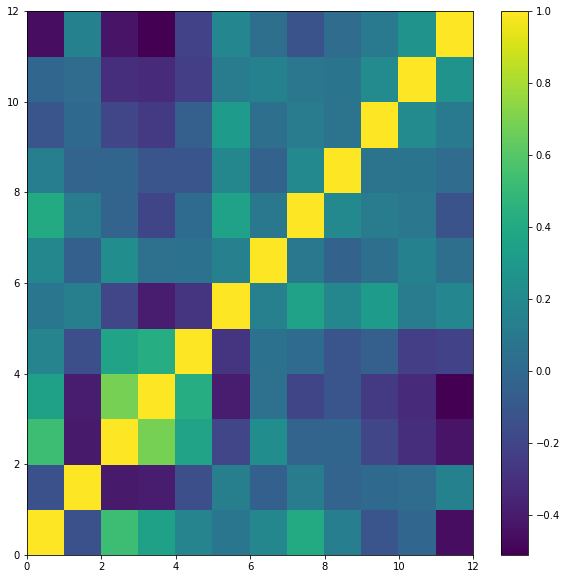

In [887]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.pcolor(corr_flavors) # use the pseudo color, or P color function to plot the contents of the correlation matrix.
plt.colorbar() # include a color bar
plt.savefig("corr_flavors.pdf")

Clearly, correlation of any dimension with itself is exactly plus 1 but other strong correlations exist too.

For example, heavy body is associated with smokiness.

In contrast, it seems that a floral flavor is the opposite of full body or medicinal notes.

We can also look at the correlation among whiskies across flavors.

To do this, we first need to transpose our table.

Since these whiskies are made by different distilleries, we can also think of this as the correlation between different distilleries in terms of the flavor profiles of the whiskies that they produce.

In [888]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())
print(corr_whisky)

          0         1         2         3         4         5         6   \
0   1.000000  0.708632  0.697354 -0.147311  0.731902  0.389086  0.464312   
1   0.708632  1.000000  0.503074 -0.228591  0.511834  0.400983  0.460830   
2   0.697354  0.503074  1.000000 -0.140435  0.557020  0.389627  0.730465   
3  -0.147311 -0.228591 -0.140435  1.000000  0.231617  0.123130 -0.430674   
4   0.731902  0.511834  0.557020  0.231617  1.000000  0.286251  0.286065   
..       ...       ...       ...       ...       ...       ...       ...   
81  0.662651  0.467396  0.828621 -0.100172  0.559690  0.297537  0.784527   
82  0.543305  0.607054  0.343536  0.151838  0.693375  0.589768  0.025786   
83  0.504753  0.631655  0.545891 -0.392074  0.424397  0.507630  0.591849   
84  0.572186  0.372342  0.358457  0.145517  0.695182  0.304348 -0.060830   
85  0.267222  0.483030  0.303273 -0.101649  0.424397  0.507630  0.434023   

          7         8         9   ...        76        77        78        79  \
0   0.

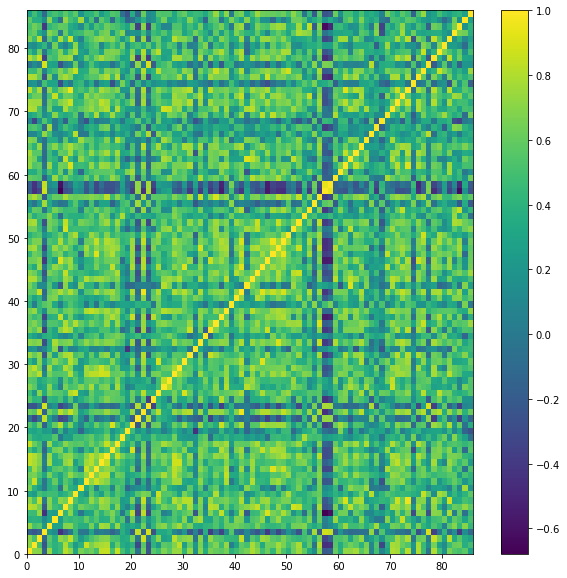

In [889]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.pcolor(corr_whisky) # use the pseudo color, or P color function to plot the contents of the correlation matrix.
plt.colorbar() # include a color bar

# modify my plot slightly by making the axes tied so that they only cover the range for which I have data.
# I can do by using the plt axis tight function.
plt.axis("tight") 

plt.savefig("corr_whisky.pdf")

How can you find a correlation matrix of a pd.Dataframe?

Ans -> pd.DataFrame.corr

How can you plot a correlation matrix by color?

Ans -> plt.pcolor

What is the matplotlib.pyplot function that plots a colorbar on the side of a plot?

Ans -> plt.colorbar()

### Clustering Whiskies By Flavor Profile

Learn how to use spectral co-clustering to cluster whiskies based on their flavor profiles

Next we're going to cluster whiskeys based on their flavor profiles.

We'll do this using a clustering method from the scikit-learn machine learning module.

The specific method we'll be using is called spectral co-clustering.

One way to think about spectral co-clustering method is to consider a list of words and a list of documents, which is the context in which the method was first introduced.

We can represent the problem as a graph, where on the left we have words and on the right, we have documents.

Let's draw this.

Words on the left.

We have documents on the right.

Here, different circles correspond to different words.

And we have our documents.

I'm going to use squares for them.

And we have lines connecting words to documents.

So for example, in this particular document, these four words might appear.

Of course, in practice, you have many more, but this is just a schematic of the basic idea.

In the second document, we might have these words.

And let me just fill in this picture.


```text
![spectral_clustering.png](figures/spectral_clustering.png)
```

![spectral_clustering.png](figures/spectral_clustering.png)

The goal is to find clusters that consist of sets of words and sets of documents that often go together.

An extreme example would be books written in different languages.

We can also think about documents that deal with specific scientific fields, such as biology or physics.

The term co-clustering refers to the idea that we simultaneously find both clusters of words and clusters of documents.

So again, each cluster consists of both words and documents.

```text
![spectral_clustering_clusters.png](figures/spectral_clustering_clusters.png)
```

![spectral_clustering_clusters.png](figures/spectral_clustering_clusters.png)

The problem as I've just presented it is still too hard to tackle, but it turns out that we can find an approximate solution to the problem.

We can first represent this graph as what is called an adjacency matrix, where the rows correspond to words and the columns correspond to documents.

Any given element of this matrix represents the number of times a given word appears in the given document.

We can then take this matrix, manipulate it in certain ways, and find an approximate solution to the stated clustering problem, in terms of eigenvalues and eigenvectors of this modified matrix.

We will not go into the details here, but the term spectral refers to the use of eigenvalues and eigenvectors of some matrix, and this is the meaning of the term spectral in spectral co-clustering.


We can think of the co-clustering technique as simultaneous clustering the rows and columns of matrix, whatever they happen to represent.

In this case, we'll be using the approach to find clusters of whiskeys in our correlation matrix of whiskey flavors.

This method effectively re-orders the rows and columns of the correlation matrix so that we can see blocks corresponding to groups of whiskeys more clearly.

Since that whiskeys in the dataset come from six different regions, we're going to ask the clustering algorithm to find six blocks.


In [890]:
from sklearn.cluster import SpectralCoclustering
model = SpectralCoclustering(n_clusters=6, random_state=0)
model.fit(corr_whisky)

SpectralCoclustering(n_clusters=6, random_state=0)

In [891]:
model.rows_

array([[False, False, False, False, False,  True, False, False, False,
        False, False,  True, False,  True, False, False,  True, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, False,  True, False, False, False, False,
         True, False,  True,  True, False, False, False, False, False,
         True, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False,
         True, False, False, False, False, False, False, False,  True,
        False, False,  True, False,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  Tru

The output is an array with the following dimensions-- number of row clusters times number of rows in the data matrix, the correlation matrix, in this case.

The entries of the array are either true or false.

Each row in this array identifies a cluster, here ranging from 0 to 5, and each column identifies a row in the correlation matrix, here ranging from 0 to 85.

If we sum all of the columns of this array, we can find out how many observations belong to each cluster.

In [892]:
np.sum(model.rows_, axis=1)

array([20,  5, 19, 17,  6, 19])

If instead we sum all of the rows, we can find out how many clusters belong to each observation.

Because each observation belongs in just one of the six clusters, the answer should be 1 for all of them.

In [893]:
np.sum(model.rows_, axis=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Let's look at the row labels in our model.

In [894]:
model.row_labels_

array([5, 2, 3, 4, 5, 0, 3, 2, 5, 3, 2, 0, 5, 0, 5, 5, 0, 5, 0, 1, 3, 4,
       3, 4, 3, 3, 2, 2, 3, 2, 3, 5, 0, 0, 0, 5, 2, 3, 0, 1, 0, 3, 2, 2,
       2, 0, 5, 0, 0, 3, 3, 2, 2, 2, 0, 1, 5, 4, 4, 0, 3, 5, 2, 5, 5, 2,
       1, 5, 1, 0, 2, 5, 0, 5, 2, 5, 3, 4, 5, 3, 0, 3, 2, 0, 2, 0])

Observation number 0 belongs to cluster number 5, observation number 1 belongs to cluster number 2, and so on.

All of the entries in the array have to be numbers between 0 and 5 because we specified 6 clusters.

What is spectral co-clustering?

a) A method for neatly plotting clustered data

b) A method for finding clusters of objects by the similarity of their attributes

c) A method for finding the spectrum of a distribution

Ans -> b

### Comparing Correlation Matrices

Let's draw the clusters as groups that we just discovered in our whisky DataFrame.

Let's also rename the indices to match the sorting.

We first extract the group labels from the model and append them to the whisky table.

We also specify their index explicitly.

We then reorder the rows in increasing order by group labels.

These are the group labels that we discovered using spectral co-clustering.

Finally, we reset the index of our DataFrame.

We have now reshuffled the rows and columns of the table.

We have now reshuffled the rows and columns of the table.

So let's also recalculate the correlation matrix.

We will also turn the correlation matrix into a NumPy array.

In [895]:
whisky.index

RangeIndex(start=0, stop=86, step=1)

In [896]:
whisky["Group"] = pd.Series(model.row_labels_, index=whisky.index)
whisky = whisky.loc[np.argsort(model.row_labels_)]
whisky = whisky.reset_index(drop=True)
correlations = pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())
correlations = np.array(correlations)

Lets then make a plot of the original correlation coefficients and the rearranged correlation coefficients, which we would expect to form clusters.

Let's use the pcolor function to plot the two correlation matrices.

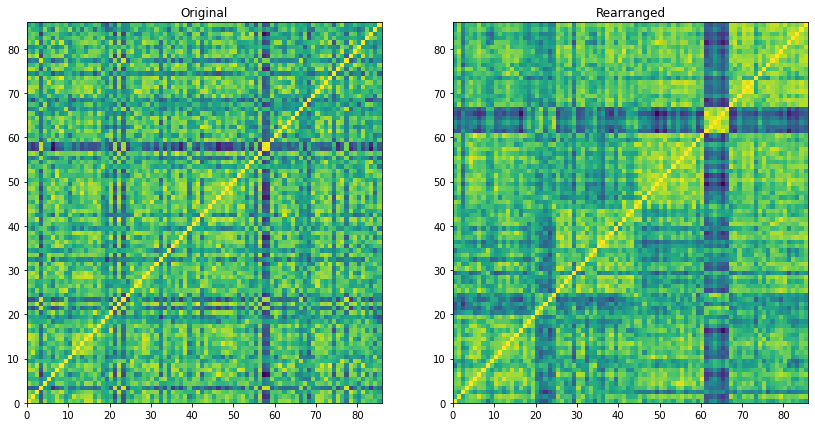

In [897]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis("tight")
plt.savefig("correlations.pdf")

We asked the spectral co-clustering method to identify six different groups of whiskies.

If you follow the diagonal line on the right from the bottom-left corner to the top-right corner, you'll be able to see visually those six blocks of whiskies.

Based on this, we would expect whiskies that belong to the same block to be similar in their flavor in terms of their smokiness, in terms of their honey flavor, and so on.

Consider the following code:
```python
import pandas as pd
data = pd.Series([1,2,3,4])
data = data.loc[[3,0,1,2]]
```

What does data[0] return? Why?

Ans -> 1: data.ix alters the order of appearance, but leaves the indices the same.

In [898]:
import pandas as pd
data = pd.Series([1,2,3,4])
data = data.loc[[3,0,1,2]]
print(data[0])
print(data)

1
3    4
0    1
1    2
2    3
dtype: int64


Consider the following code:

```python
import pandas as pd
data = pd.Series([1,2,3,4])
data = data.loc[[3,0,1,2]]
data = data.reset_index(drop=True)
```

What does data[0] return? Why?

Ans -> 4: The 0th index of the data has been reordered to index 3 of the original, which is 4.

In [899]:
import pandas as pd
data = pd.Series([1,2,3,4])
data = data.loc[[3,0,1,2]]
data = data.reset_index(drop=True)
print(data[0])
print(data)

4
0    4
1    1
2    2
3    3
dtype: int64
